<h2> RA 1. Instalação e importação dos pacotes</h2>

In [84]:
#### Pandas - Análise de Dados ####
#%pip install pandas

#### Numpy - Cálculos de vetores e matrizes ####
#%pip install numpy

#### Scipy - Cálculos, integrais, equações diferenciais ####
#%pip install scipy

#### Matplotlib e Seaborn - Visualização de dados e gráficos ####
#%pip install matplotlib
#%pip install seaborn

##################################################################
%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CPU times: total: 0 ns
Wall time: 1.01 ms


<h2> RA 1. Carregar o dataset</h2>

<h3> 1.1. Leitura do dataset</h3>

In [85]:
#Leitura do dataframe
dataset = pd.read_csv(
    filepath_or_buffer='diabetes.csv',
    sep=',',
    header=0
)
#Mostra os primeiros registros
dataset.head()

CPU times: total: 0 ns
Wall time: 0 ns


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h2> RA 2. Selecionar e tratar entradas e saídas</h2>

<h3> 2.1. Verificando as informações do dataframe </h3>

In [21]:
#Informações sobre as variáveis
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
#Faz um sumário do dataset. O .T serve para pivotar o resultado
#Round para arredondar os resultados em 2 casas decimais
#dataset.describe().T
round(dataset.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


<h3> 2.2. Matriz de Correlação </h3>

Text(0.5, 1.0, 'Correlação das features')

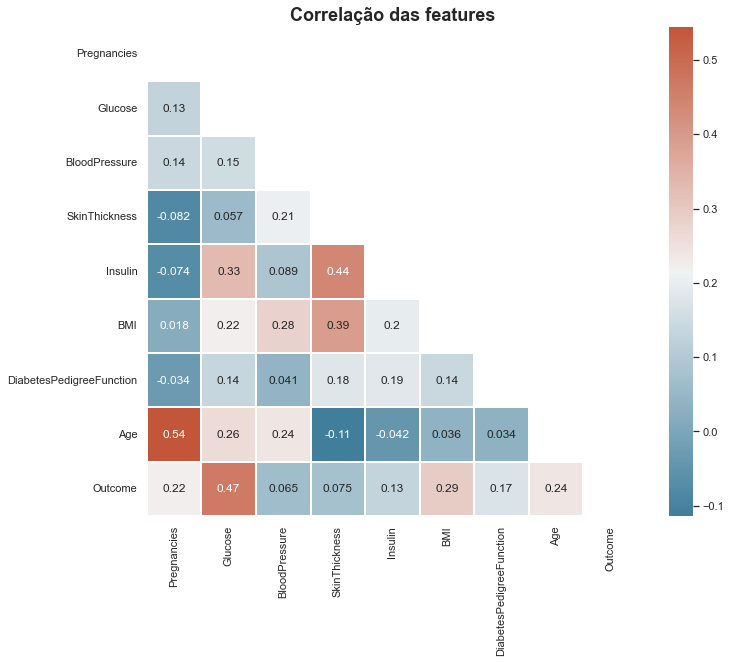

In [87]:
#Setar o tema do gráfico no Seaborn
sns.set_theme(style='white')

#Definir a matriz de correlação
corr = dataset.corr()

#Gera uma máscara para o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

#Definindo um mapa de cores divergentes
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Definindo o tamanho da figura
f, ax = plt.subplots(figsize=(11, 9))

#### Heatmap de Correlação ####
sns.heatmap(
    data = corr, #dados
    mask = mask, #não mostrar dados nas células onde há a máscara
    cmap = cmap, 
    linewidth = .10, #linhas entre os quadrados
    annot=True #incluir o valor nas figuras
)
plt.title('Correlação das features', size=18, fontweight='bold') #Título do gráfico

<h3> 2.3. Análises univariadas</h3>

<h5>2.3.1. Gravidezes</h5>

Text(0.5, 1.0, 'Boxplot - Quantidade de gravidezes')

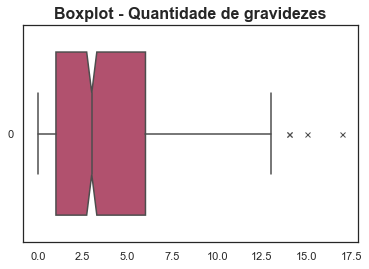

In [82]:
#Pregnancies
sns.boxplot(
    data=dataset['Pregnancies'], #dados
    orient='h', #orientação do gráfico
    palette='flare', #paleta de cores
    width=0.75, #largura de alinhamento
    notch=True, #notch na mediana
    flierprops={"marker": "x"}, #tipo de outliers
    showcaps=True, #linhas de início
    fliersize=5. #tamanho da marcação dos outliers
)
plt.title('Boxplot - Quantidade de gravidezes', size=16, fontweight='bold') #Título do gráfico

<h5>2.3.2. Glicose</h5>

Text(0.5, 1.0, 'Boxplot - Glicose')

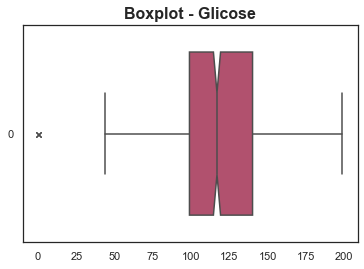

In [60]:
#Glicose
sns.boxplot(
    data=dataset['Glucose'], #dados
    orient='h', #orientação do gráfico
    palette='flare', #paleta de cores
    width=0.75, #largura de alinhamento
    notch=True, #notch na mediana
    flierprops={"marker": "x"}, #tipo de outliers
    showcaps=True, #linhas de início
    fliersize=5. #tamanho da marcação dos outliers
)
plt.title('Boxplot - Glicose', size=16, fontweight='bold') #Título do gráfico

<h5>2.3.3. Pressão Arterial</h5>

Text(0.5, 1.0, 'Boxplot - Pressão Arterial')

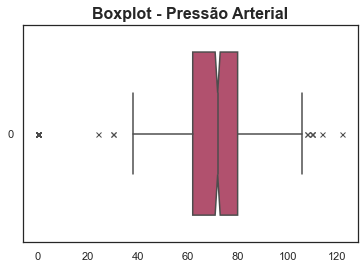

In [62]:
#BloodPressure
sns.boxplot(
    data=dataset['BloodPressure'], #dados
    orient='h', #orientação do gráfico
    palette='flare', #paleta de cores
    width=0.75, #largura de alinhamento
    notch=True, #notch na mediana
    flierprops={"marker": "x"}, #tipo de outliers
    showcaps=True, #linhas de início
    fliersize=5. #tamanho da marcação dos outliers
)
plt.title('Boxplot - Pressão Arterial', size=16, fontweight='bold') #Título do gráfico

<h5>2.3.4. Espessura da Pele</h5>

Text(0.5, 1.0, 'Boxplot - Espessura da pele')

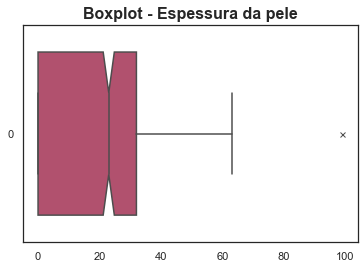

In [83]:
#SkinThickness
sns.boxplot(
    data=dataset['SkinThickness'], #dados
    orient='h', #orientação do gráfico
    palette='flare', #paleta de cores
    width=0.75, #largura de alinhamento
    notch=True, #notch na mediana
    flierprops={"marker": "x"}, #tipo de outliers
    showcaps=True, #linhas de início
    fliersize=5. #tamanho da marcação dos outliers
)
plt.title('Boxplot - Espessura da pele', size=16, fontweight='bold') #Título do gráfico

<h5>2.3.5. Insulina</h5>

Text(0.5, 1.0, 'Boxplot - Insulina')

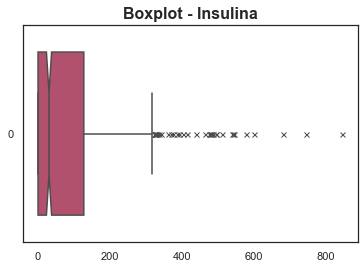

In [64]:
#Insulin
sns.boxplot(
    data=dataset['Insulin'], #dados
    orient='h', #orientação do gráfico
    palette='flare', #paleta de cores
    width=0.75, #largura de alinhamento
    notch=True, #notch na mediana
    flierprops={"marker": "x"}, #tipo de outliers
    showcaps=True, #linhas de início
    fliersize=5. #tamanho da marcação dos outliers
)
plt.title('Boxplot - Insulina', size=16, fontweight='bold') #Título do gráfico

<h5>2.3.6. IMC - Índice de Massa Corpórea</h5>

Text(0.5, 1.0, 'Boxplot - IMC | Índice de Massa Corpórea')

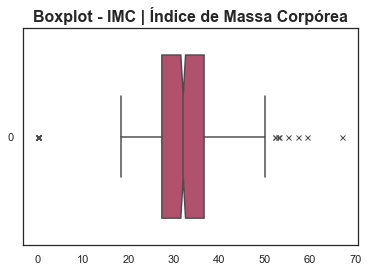

In [66]:
#BMI
sns.boxplot(
    data=dataset['BMI'], #dados
    orient='h', #orientação do gráfico
    palette='flare', #paleta de cores
    width=0.75, #largura de alinhamento
    notch=True, #notch na mediana
    flierprops={"marker": "x"}, #tipo de outliers
    showcaps=True, #linhas de início
    fliersize=5. #tamanho da marcação dos outliers
)
plt.title('Boxplot - IMC | Índice de Massa Corpórea', size=16, fontweight='bold') #Título do gráfico

<h5>2.3.7. Função de Linhagem de Diabetes </h5>

Text(0.5, 1.0, 'Boxplot - Função de Pedigree Diabetes')

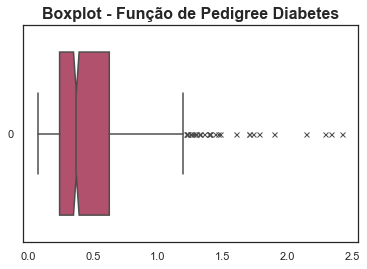

In [68]:
#DiabetesPedigreeFunction
sns.boxplot(
    data=dataset['DiabetesPedigreeFunction'], #dados
    orient='h', #orientação do gráfico
    palette='flare', #paleta de cores
    width=0.75, #largura de alinhamento
    notch=True, #notch na mediana
    flierprops={"marker": "x"}, #tipo de outliers
    showcaps=True, #linhas de início
    fliersize=5. #tamanho da marcação dos outliers
)
plt.title('Boxplot - Função de Pedigree Diabetes', size=16, fontweight='bold') #Título do gráfico

<h5>2.3.8. Idade </h5>

Text(0.5, 1.0, 'Boxplot - Idade')

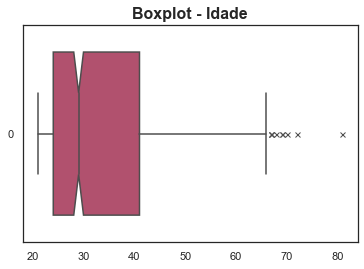

In [69]:
#Age
sns.boxplot(
    data=dataset['Age'], #dados
    orient='h', #orientação do gráfico
    palette='flare', #paleta de cores
    width=0.75, #largura de alinhamento
    notch=True, #notch na mediana
    flierprops={"marker": "x"}, #tipo de outliers
    showcaps=True, #linhas de início
    fliersize=5. #tamanho da marcação dos outliers
)
plt.title('Boxplot - Idade', size=16, fontweight='bold') #Título do gráfico

<h5>2.3.9. Resultado </h5>

Text(0.5, 1.0, 'Boxplot - Resultado')

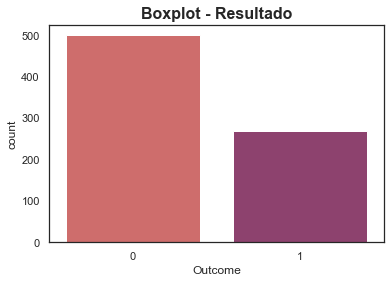

In [81]:
#Outcome
sns.countplot(
    data = dataset,
    x = dataset['Outcome'], #dados
    palette='flare', #paleta de cores
)
plt.title('Boxplot - Resultado', size=16, fontweight='bold') #Título do gráfico

<h3> 2.4. Padronização do dataset</h3>

<h5>2.4.1. Regularização </h5>

In [102]:
#Cria uma lista com o nome das variáveis
col_list = dataset.columns.tolist()
#Remove a variável alvo da lista
col_list.remove('Outcome')
#Cria o dataset de treino com as variáveis 
x = dataset[col_list]
#Cria uma variável com os dados de resultado
y = dataset['Outcome']
#Cria um array com os resultados
y = y[ :, np.newaxis]

C:\Users\willy\AppData\Local\Temp\ipykernel_16700\3888393741.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[ :, np.newaxis]


<h3> 2.5. Separando Treino e Teste</h3>

<h5>2.5.1. Importação das bibliotecas </h5>

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<h5>2.5.2. Preparando os dados de treino e teste </h5>

In [106]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=4
)